In [ ]:
from google.colab import auth
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
import cv2 as cv
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import subprocess
import itertools
from tqdm import tqdm
import os
import numba as nb
plt.style.use("seaborn-v0_8-white")

from google.colab import drive
drive.mount('/content/gdrive')

auth.authenticate_user()

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/AnujTiwari/India-State-and-Country-Shapefile-Updated-Jan-2020.git

Cloning into 'India-State-and-Country-Shapefile-Updated-Jan-2020'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 28 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (28/28), 16.46 MiB | 8.89 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
tile_meta = gpd.read_file("/content/gdrive/MyDrive/field_delineation/india_DLTiles.gpkg")

In [ ]:
states = gpd.read_file("/content/India-State-and-Country-Shapefile-Updated-Jan-2020/India_State_Boundary.shp")
states.to_crs("EPSG:4326", inplace=True)

In [ ]:
states.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12..."
1,Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20..."
3,Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989..."
4,Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152..."


In [ ]:
"""
gdf = gpd.GeoDataFrame()#crs=states.crs)
for crs in tile_meta.bounds_crs.unique():
    crs_df = tile_meta.loc[tile_meta.bounds_crs == crs]
    crs_df.set_crs(crs, allow_override=True, inplace=True)
    crs_df.to_crs("EPSG:4326", inplace=True)
    gdf = pd.concat([gdf, crs_df])
"""
gdf = tile_meta.copy()
gdf = gdf[["key", "geometry"]]

<Axes: >

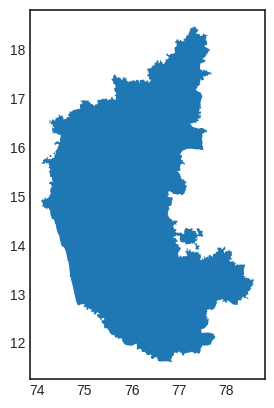

In [ ]:
fig, ax = plt.subplots()
states.loc[states.State_Name == "Karnataka"].plot(ax=ax)

In [ ]:
gdf_mp = gdf.loc[gdf.within(states.loc[states.State_Name == "Karnataka"].geometry.iat[0])]

In [ ]:
gdf_mp[["unknown0", "unknown1", "unknown2", "z", "x", "y"]] = gdf_mp["key"].str.split(":", expand=True)
gdf_mp[["z", "x", "y"]] = gdf_mp[["z", "x", "y"]].astype(int)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
gdf_mp[gdf_mp.z == 44]

,key,geometry,unknown0,unknown1,unknown2,z,x,y
54553,3840:128:1.5:44:-51:249,"POLYGON ((78.29067 12.95798, 78.34726 12.95856...",3840,128,1.5,44,-51,249
54554,3840:128:1.5:44:-50:249,"POLYGON ((78.34372 12.95852, 78.40031 12.95910...",3840,128,1.5,44,-50,249
54560,3840:128:1.5:44:-51:250,"POLYGON ((78.29011 13.01001, 78.34670 13.01059...",3840,128,1.5,44,-51,250
54561,3840:128:1.5:44:-50:250,"POLYGON ((78.34317 13.01055, 78.39977 13.01113...",3840,128,1.5,44,-50,250
54562,3840:128:1.5:44:-49:250,"POLYGON ((78.39623 13.01109, 78.45283 13.01165...",3840,128,1.5,44,-49,250
...,...,...,...,...,...,...,...,...
55106,3840:128:1.5:44:-57:260,"POLYGON ((77.96535 13.52660, 78.02205 13.52728...",3840,128,1.5,44,-57,260
55107,3840:128:1.5:44:-57:261,"POLYGON ((77.96469 13.57861, 78.02140 13.57930...",3840,128,1.5,44,-57,261
55108,3840:128:1.5:44:-56:264,"POLYGON ((78.01589 13.73529, 78.07264 13.73597...",3840,128,1.5,44,-56,264
55109,3840:128:1.5:44:-56:265,"POLYGON ((78.01523 13.78730, 78.07200 13.78799...",3840,128,1.5,44,-56,265


In [ ]:
xx = list(sorted(set(gdf_mp.loc[gdf_mp.z == 44].x)))
yy = list(sorted(set(gdf_mp.loc[gdf_mp.z == 44].y)))

In [ ]:
BATCH_SIZE = 10
xx_batches = np.unique(np.array(xx) // BATCH_SIZE)
yy_batches = np.unique(np.array(yy) // BATCH_SIZE)

In [ ]:
yy_batches

array([24, 25, 26])

In [ ]:
cmap = plt.cm.get_cmap("tab20", 20)

<ipython-input-14-2faa7614f6f3>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", 20)


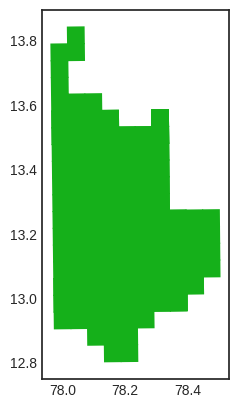

In [ ]:
i = 0
fig, ax = plt.subplots(1)
gdf_batched = pd.DataFrame()
for x in xx_batches:
    for y in yy_batches:
        x_cond_inner = (gdf_mp.x//BATCH_SIZE == x)
        x_cond = x_cond_inner.copy()
        x_cond |= (gdf_mp.x//BATCH_SIZE == x-1) & (gdf_mp.x%BATCH_SIZE == BATCH_SIZE-1)
        x_cond |= (gdf_mp.x//BATCH_SIZE == x+1) & (gdf_mp.x%BATCH_SIZE == 0)
        y_cond_inner = (gdf_mp.y//BATCH_SIZE == y)
        y_cond = y_cond_inner.copy()
        y_cond |= (gdf_mp.y//BATCH_SIZE == y-1) & (gdf_mp.y%BATCH_SIZE == BATCH_SIZE-1)
        y_cond |= (gdf_mp.y//BATCH_SIZE == y+1) & (gdf_mp.y%BATCH_SIZE == 0)
        z_cond = (gdf_mp.z == 44)
        gdf_roi = gdf_mp.loc[x_cond & y_cond & z_cond].copy()
        if len(gdf_roi) > 0:
            #gdf_roi.plot(ax=ax, color=cmap(np.random.randint(20)))
            gdf_roi.plot(ax=ax, color=["xkcd:green", "xkcd:orange"][i>29])
            gdf_roi["inner"] = False
            gdf_roi.loc[x_cond_inner & y_cond_inner & z_cond, "inner"] = True
            gdf_roi["batch"] = i
            gdf_batched = pd.concat([gdf_batched, gdf_roi])
            i += 1

## Search for missing tiles

In [ ]:
!gsutil cp gs://india_field_delineation/metadata/india_airbus_metadata_all.csv /content/metadata.csv
metadata = pd.read_csv("/content/metadata.csv")

meta_df = pd.merge(gdf_mp, metadata.loc[metadata.image_id==0], how="inner", left_on="key", right_on=["DLTile_key"])
meta_df.rename(columns={"batch_x": "stitching_batch", "batch_y": "file_batch"}, inplace=True)



Copying gs://india_field_delineation/metadata/india_airbus_metadata_all.csv...
- [1 files][ 11.4 MiB/ 11.4 MiB]                                                
Operation completed over 1 objects/11.4 MiB.                                     


In [ ]:

def list_files_in_bucket(bucket_path):
    try:
        # Run gsutil ls command to list files in the bucket
        command = f"gsutil ls -r gs://{bucket_path}"
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)

        # Split the output into lines to get individual file paths
        file_paths = result.stdout.strip().split("\n")
        return file_paths
    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")
        return []


bucket_path_source = "india_field_delineation/predictions/semantic_uncertainty_4096px"
bucket_files_source = list_files_in_bucket(bucket_path_source)
bucket_files_source = [s for s in bucket_files_source if s.endswith(".png")]
#bucket_files_source = [f"{s[74:76]}/{s[83:88]}" for s in bucket_files_source]

offset = len(bucket_path_source) + 6
bucket_files_source = [f"{s[offset:][6:8]}/{s[offset:][15:20]}" for s in bucket_files_source]

In [ ]:
bucket_files_source[:5]

['00/00000', '00/00003', '00/00004', '00/00005', '00/00006']

In [ ]:
for i, row in meta_df.iterrows():
    tile_id = row["tile_id"]
    file_batch = row["batch"]
    id = "{:02d}/{:05d}".format(file_batch, tile_id)
    meta_df.loc[i, "found_source"] = (id in bucket_files_source)
    meta_df.loc[i, "bucket_key"] = id

<Axes: >

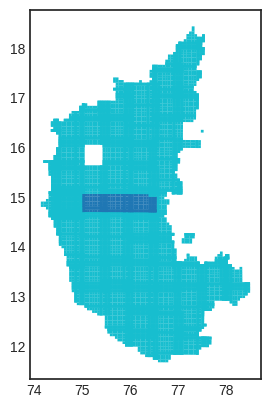

In [ ]:
meta_df.plot(column="found_source", cmap="tab10")

In [ ]:
meta_df.to_file("/content/gdrive/MyDrive/field_delineation/tiles_karnataka.gpkg", layer='tiles', driver="GPKG")

,key,geometry,unknown0,unknown1,unknown2,z,x,y,tile_id,DLTile_key,image_id,airbus_acquired_date,batch,found_source,bucket_key
0,3840:128:1.5:43:50:231,"POLYGON ((77.64321 12.02198, 77.69959 12.02144...",3840,128,1.5,43,50,231,7299,3840:128:1.5:43:50:231,0,2021-02-04T04:59:40.331000+00:00,7,False,7/7299
1,3840:128:1.5:43:50:232,"POLYGON ((77.64372 12.07402, 77.70011 12.07348...",3840,128,1.5,43,50,232,7303,3840:128:1.5:43:50:232,0,2021-02-04T04:59:40.331000+00:00,7,False,7/7303
2,3840:128:1.5:43:50:233,"POLYGON ((77.64423 12.12605, 77.70064 12.12551...",3840,128,1.5,43,50,233,7307,3840:128:1.5:43:50:233,0,2021-02-04T04:59:40.331000+00:00,7,False,7/7307
3,3840:128:1.5:43:50:233,"POLYGON ((77.64423 12.12605, 77.70064 12.12551...",3840,128,1.5,43,50,233,7307,3840:128:1.5:43:50:233,1,2021-03-09T04:54:31.568000+00:00,7,False,7/7307
4,3840:128:1.5:43:50:244,"POLYGON ((77.65002 12.69841, 77.70655 12.69784...",3840,128,1.5,43,50,244,7351,3840:128:1.5:43:50:244,0,2021-01-29T04:55:25.835000+00:00,7,False,7/7351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,3840:128:1.5:44:-56:265,"POLYGON ((78.01523 13.78730, 78.07200 13.78799...",3840,128,1.5,44,-56,265,55109,3840:128:1.5:44:-56:265,1,2020-12-21T04:55:49.823000+00:00,55,True,55/55109
9565,3840:128:1.5:44:-57:264,"POLYGON ((77.96269 13.73464, 78.01944 13.73533...",3840,128,1.5,44,-57,264,55116,3840:128:1.5:44:-57:264,0,2020-10-30T04:56:41.354000+00:00,55,True,55/55116
9566,3840:128:1.5:44:-57:264,"POLYGON ((77.96269 13.73464, 78.01944 13.73533...",3840,128,1.5,44,-57,264,55116,3840:128:1.5:44:-57:264,1,2020-10-30T04:56:41.354000+00:00,55,True,55/55116
9567,3840:128:1.5:44:-57:264,"POLYGON ((77.96269 13.73464, 78.01944 13.73533...",3840,128,1.5,44,-57,264,55116,3840:128:1.5:44:-57:264,2,2020-12-21T04:55:49.823000+00:00,55,True,55/55116


## Check which tiles are missing

In [ ]:
!gsutil cp gs://india_field_delineation/metadata/india_airbus_metadata_all.csv /content/metadata.csv
metadata = pd.read_csv("/content/metadata.csv")

meta_df = pd.merge(gdf_batched, metadata.loc[metadata.image_id==0], how="inner", left_on="key", right_on=["DLTile_key"])
meta_df.rename(columns={"batch_x": "stitching_batch", "batch_y": "file_batch"}, inplace=True)

def list_files_in_bucket(bucket_path):
    try:
        # Run gsutil ls command to list files in the bucket
        command = f"gsutil ls -r gs://{bucket_path}"
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)

        # Split the output into lines to get individual file paths
        file_paths = result.stdout.strip().split("\n")
        return file_paths
    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")
        return []

bucket_path_res = "india_field_delineation/predictions/watershed_instances_4096p_tileable/res"
bucket_files_res = list_files_in_bucket(bucket_path_res)
bucket_files_res = [s for s in bucket_files_res if s.endswith(".npy")]
bucket_files_res = [f"{s[86:88]}/{s[95:100]}" for s in bucket_files_res]


bucket_path_source = "india_field_delineation/predictions/watershed_instances_4096px"
bucket_files_source = list_files_in_bucket(bucket_path_source)
bucket_files_source = [s for s in bucket_files_source if s.endswith(".npy")]
bucket_files_source = [f"{s[74:76]}/{s[83:88]}" for s in bucket_files_source]


bucket_path_extent = "india_field_delineation/predictions/extent_predictions_4096px_averaged"
bucket_files_extent = list_files_in_bucket(bucket_path_extent)
bucket_files_extent = [s for s in bucket_files_extent if s.endswith(".png")]
bucket_files_extent = [f"{s[82:84]}/{s[91:96]}" for s in bucket_files_extent]

Copying gs://india_field_delineation/metadata/india_airbus_metadata_all.csv...
/ [1 files][ 11.4 MiB/ 11.4 MiB]                                                
Operation completed over 1 objects/11.4 MiB.                                     


In [ ]:
len(bucket_files_extent), len(bucket_files_source), len(bucket_files_res)

(95185, 95185, 4981)

In [ ]:
#bucket_files_source_roi = []
#for i, row in meta_df.loc[meta_df["inner"]].iterrows():
#        tile_id = row["tile_id"]
#        file_batch = row["file_batch"]
#        id = f"{file_batch}/{tile_id}"
#        if id in bucket_files_source:
#            bucket_files_source_roi.append(id)

In [ ]:
#diff = set(bucket_files_res) - set(bucket_files_source_roi)

In [ ]:
for i, row in meta_df.loc[meta_df["inner"]].iterrows():
        tile_id = row["tile_id"]
        file_batch = row["file_batch"]
        id = f"{file_batch}/{tile_id}"
        meta_df.loc[meta_df["key"] == row["key"], "found_res"] = (id in bucket_files_res)
        meta_df.loc[meta_df["key"] == row["key"], "found_source"] = (id in bucket_files_source)
        meta_df.loc[meta_df["key"] == row["key"], "found_extent"] = (id in bucket_files_extent)

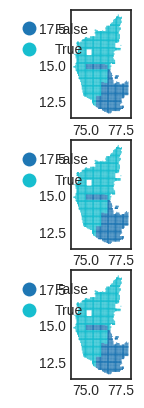

In [ ]:
fig, axs = plt.subplots(3)
ax = axs[0]
meta_df.plot(column="found_res", cmap="tab10", ax=ax, legend=True)
ax.get_legend().set_bbox_to_anchor((0.5, 1))

ax = axs[1]
meta_df.plot(column="found_source", cmap="tab10", ax=ax, legend=True)
ax.get_legend().set_bbox_to_anchor((0.5, 1))

ax = axs[2]
meta_df.plot(column="found_extent", cmap="tab10", ax=ax, legend=True)
ax.get_legend().set_bbox_to_anchor((0.5, 1))

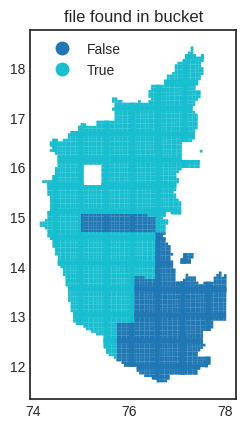

In [ ]:
fig, ax = plt.subplots(1)
meta_df.plot(column="found_extent", cmap="tab10", ax=ax, legend=True)
ax.get_legend().set_bbox_to_anchor((0.5, 1))
ax.set_title("file found in bucket")
fig.savefig("/content/file_found_map.png", dpi=200)

In [ ]:
sum(meta_df.found_extent) / len(meta_df.found_extent)

0.6948676824378508

In [ ]:
gdf_batched

,key,geometry,unknown0,unknown1,unknown2,z,x,y,inner,batch
54553,3840:128:1.5:44:-51:249,"POLYGON ((78.29067 12.95798, 78.34726 12.95856...",3840,128,1.5,44,-51,249,True,0
54554,3840:128:1.5:44:-50:249,"POLYGON ((78.34372 12.95852, 78.40031 12.95910...",3840,128,1.5,44,-50,249,False,0
54560,3840:128:1.5:44:-51:250,"POLYGON ((78.29011 13.01001, 78.34670 13.01059...",3840,128,1.5,44,-51,250,False,0
54561,3840:128:1.5:44:-50:250,"POLYGON ((78.34317 13.01055, 78.39977 13.01113...",3840,128,1.5,44,-50,250,False,0
54721,3840:128:1.5:44:-54:246,"POLYGON ((78.13331 12.80021, 78.18986 12.80082...",3840,128,1.5,44,-54,246,True,0
...,...,...,...,...,...,...,...,...,...,...
54820,3840:128:1.5:44:-51:258,"POLYGON ((78.28550 13.42622, 78.34220 13.42682...",3840,128,1.5,44,-51,258,False,4
54827,3840:128:1.5:44:-51:259,"POLYGON ((78.28492 13.47824, 78.34162 13.47885...",3840,128,1.5,44,-51,259,False,4
54834,3840:128:1.5:44:-51:260,"POLYGON ((78.28433 13.53027, 78.34105 13.53088...",3840,128,1.5,44,-51,260,False,4
54827,3840:128:1.5:44:-51:259,"POLYGON ((78.28492 13.47824, 78.34162 13.47885...",3840,128,1.5,44,-51,259,False,5


In [ ]:
#gdf_batched.to_file("/content/gdrive/MyDrive/field_delineation/tiles_karnataka.gpkg", layer='tiles', driver="GPKG")
gdf_batched[["key", "x", "y", "batch", "inner"]].to_csv("/content/gdrive/MyDrive/field_delineation/tiles_karnataka2.csv")